# Fixed pattern noise
```
- a fixed pattern noise can be obtained by median combining many bias frames
- (if necessary) we can also check the stability of the fixed pattern noise
- display as an image (make sure to use a good image stretch to see any faint structure) --> Asinh streching can be a good one (https://docs.astropy.org/en/stable/api/astropy.visualization.AsinhStretch.html#astropy.visualization.AsinhStretch). Make sure to add an image scale bar as shown in https://docs.astropy.org/en/stable/visualization/normalization.html
```

In [8]:
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt


def load_images(img_dir: str) -> np.array:
   image_files = sorted([f for f in os.listdir(img_dir) if os.path.isfile(os.path.join(img_dir, f))])
   assert image_files, "No files found"

   images = []
   try:
      for image_file in image_files:
         image_path = os.path.join(img_dir, image_file)
         print(image_file)
         img = Image.open(image_path)
         images.append(np.array(img))
      return np.array(images)
   except Exception as e:
      print(f"err:  {e}")
      return np.array([])


bias = load_images("/Users/aiden/STEMin3D/esp32-cam-project/esp32-cam-project/experiments/exp-3/bias")
assert len(bias) != 0, "No biases found."
print("Number of bias frames:", len(bias))

darks = load_images("/Users/aiden/STEMin3D/esp32-cam-project/esp32-cam-project/experiments/exp-3/darks")
assert len(darks) != 0, "No biases found."
print("Number of darks frames:", len(darks))

freezer_frames_bias__0_exp_40_quality_1_gain_1_clockrate_1_vsync_lines_0_2025-02-02T15-57-46.778Z_frame2.bmp
freezer_frames_bias__0_exp_40_quality_1_gain_1_clockrate_1_vsync_lines_0_2025-02-02T15-58-12.289Z_frame3.bmp
freezer_frames_bias__0_exp_40_quality_1_gain_1_clockrate_1_vsync_lines_0_2025-02-02T15-58-37.787Z_frame4.bmp
freezer_frames_bias__0_exp_40_quality_1_gain_1_clockrate_1_vsync_lines_0_2025-02-02T15-59-03.363Z_frame5.bmp
freezer_frames_bias__0_exp_40_quality_1_gain_1_clockrate_1_vsync_lines_0_2025-02-02T15-59-28.956Z_frame6.bmp
freezer_frames_bias__0_exp_40_quality_1_gain_1_clockrate_1_vsync_lines_0_2025-02-02T15-59-54.532Z_frame7.bmp
freezer_frames_bias__0_exp_40_quality_1_gain_1_clockrate_1_vsync_lines_0_2025-02-02T16-00-20.121Z_frame8.bmp
freezer_frames_bias__0_exp_40_quality_1_gain_1_clockrate_1_vsync_lines_0_2025-02-02T16-00-45.685Z_frame9.bmp
freezer_frames_bias__0_exp_40_quality_1_gain_1_clockrate_1_vsync_lines_0_2025-02-02T16-01-11.287Z_frame10.bmp
freezer_frames_bia

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


haha


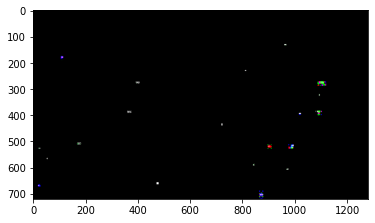

In [28]:
master_bias = np.median(bias, axis=0)
bias_std_frame = np.std(bias, axis=0)

plt.imshow(master_bias)
print("haha")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


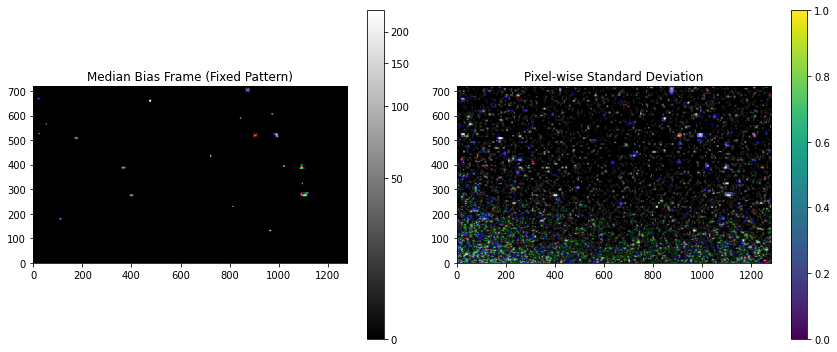

In [29]:
from astropy.visualization import AsinhStretch, ImageNormalize

norm = ImageNormalize(master_bias, stretch=AsinhStretch())

plt.figure(figsize=(12, 5))

# Median (Fixed Pattern Noise) image
plt.subplot(1, 2, 1)
plt.imshow(master_bias, origin='lower', cmap='gray', norm=norm)
plt.title('Median Bias Frame (Fixed Pattern)')
plt.colorbar()

# Standard Deviation image
plt.subplot(1, 2, 2)
plt.imshow(bias_std_frame, origin='lower', cmap='viridis')
plt.title('Pixel-wise Standard Deviation')
plt.colorbar()

plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


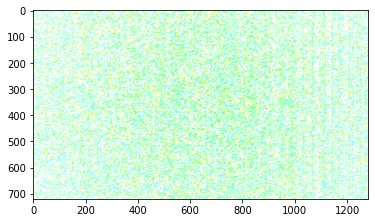

In [ ]:
master_dark = np.median(darks, axis=0)
dark_std = np.std(darks, axis=0)
plt.imshow(master_dark)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


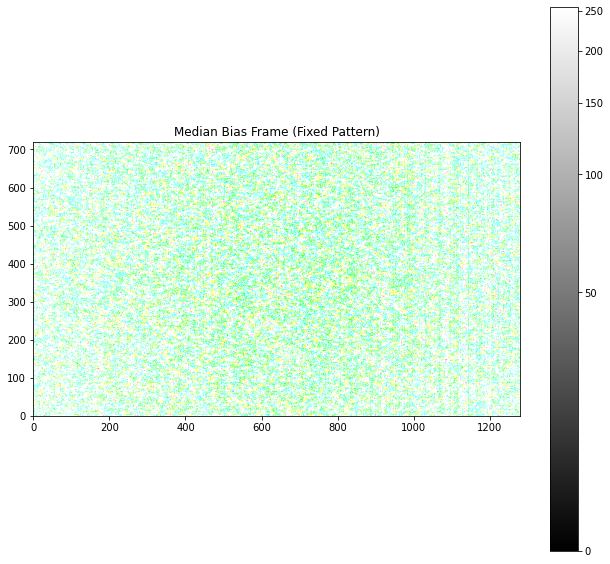

In [ ]:
norm = ImageNormalize(master_dark, stretch=AsinhStretch())

plt.figure(figsize=(12, 5))

# Median (Fixed Pattern Noise) image
plt.subplot(1, 2, 1)
plt.imshow(master_dark, origin='lower', cmap='gray', norm=norm)
plt.title('Median Bias Frame (Fixed Pattern)')
plt.colorbar()

# Standard Deviation image
plt.subplot(1, 2, 2)
plt.imshow(dark_std, origin='lower', cmap='viridis')
plt.title('Pixel-wise Standard Deviation')
plt.colorbar()

plt.tight_layout()
plt.show()

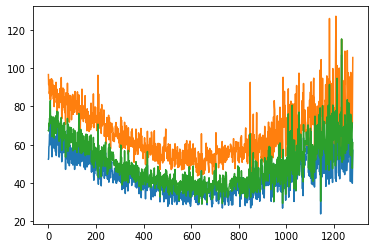

In [22]:
red_std = np.mean(master_dark[:, :, 0], axis=0)
green_std = np.mean(master_dark[:, :, 1], axis=0)
blue_std = np.mean(master_dark[:, :, 2], axis=0)
plt.plot(red_std)
plt.plot(green_std)
plt.plot(blue_std)